<a href="https://colab.research.google.com/github/reallyclean-sauce/cifar10-analysis/blob/master/CIFAR10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CIFAR-10 Using Multi-Layer Perceptron

In [0]:
''' CNN CIFAR-10 classification
'''

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
# import cifar10 dataset
from tensorflow.keras.datasets import cifar10

# Load cifar10 Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [0]:
#gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
# x_new = rgb_to_grayscale(x_train)

x_train_gray = np.dot(x_train[:,:,:,:3], [0.299, 0.587, 0.114])
x_test_gray = np.dot(x_test[:,:,:,:3], [0.299, 0.587, 0.114])

# x_train_gray = x_train_gray.reshape(-1,32,32,1)
# x_test_gray = x_test_gray.reshape(-1,32,32,1)



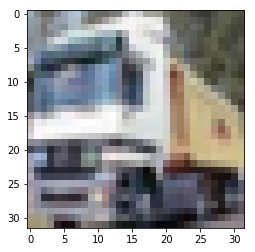

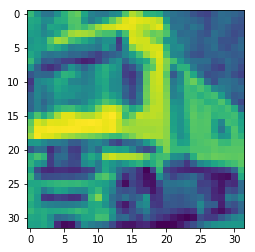

In [4]:
plt.imshow(x_train[1])
plt.show()

# plt.imshow(x_train_gray[1,:,:,0], cmap='gray')
# plt.show()

plt.imshow(x_train_gray[1])
plt.show()

In [5]:
x_train_gray.shape

(50000, 32, 32)

In [6]:
# compute the number of labels
num_labels = len(np.unique(y_train))
num_labels

10

In [7]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_labels


10

In [8]:
# image dimensions (assumed square)
image_size = x_train_gray.shape[1]

# So that the dataset is suitable for CNN 
x_train_gray = np.reshape(x_train_gray,[-1, image_size, image_size, 1])
x_test_gray = np.reshape(x_test_gray,[-1, image_size, image_size, 1])

# Normalization
# Harder to train if not normalized
x_train_gray = x_train_gray.astype('float32') / 255
x_test_gray = x_test_gray.astype('float32') / 255
num_labels

10

In [9]:
num_labels

10

In [0]:
# network parameters
# image is processed as is (square grayscale)
input_shape = (image_size, image_size, 1)
batch_size = 128

# 3x3
kernel_size = 3

# For every 2x2 square, output of maxpooling is 1 pixel
pool_size = 2

# 64 filters per layer
filters = 64

# Regularizer
dropout = 0.2

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________

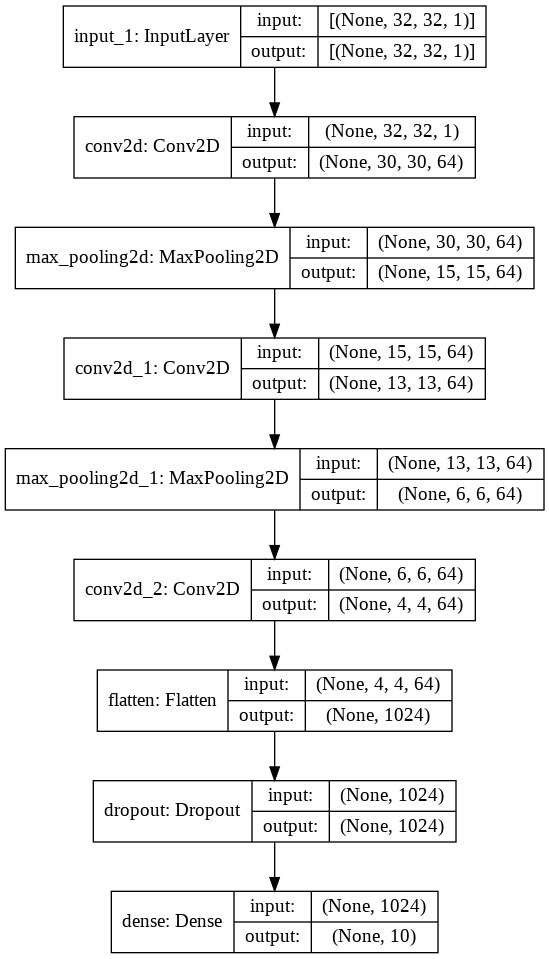

In [0]:
# use functional API to build cnn layers
inputs = Input(shape=input_shape)
y = Conv2D(filters=filters,
           kernel_size=kernel_size,
           activation='relu')(inputs)
y = MaxPooling2D()(y)
y = Conv2D(filters=filters,
           kernel_size=kernel_size,
           activation='relu')(y)
y = MaxPooling2D()(y)
y = Conv2D(filters=filters,
           kernel_size=kernel_size,
           activation='relu')(y)
# image to vector before connecting to dense layer
y = Flatten()(y)
# dropout regularization
y = Dropout(dropout)(y)
outputs = Dense(num_labels, activation='softmax')(y)

# build the model by supplying inputs/outputs
model = Model(inputs=inputs, outputs=outputs)

# network model in text
model.summary()
plot_model(model, to_file='cnn-mnist.png', show_shapes=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 9s 173us/sample - loss: 1.8309 - acc: 0.3369 - val_loss: 1.5405 - val_acc: 0.4529
Epoch 2/100
50000/50000 [==============================] - 6s 118us/sample - loss: 1.4820 - acc: 0.4810 - val_loss: 1.3664 - val_acc: 0.5225
Epoch 3/100
50000/50000 [==============================] - 6s 118us/sample - loss: 1.3487 - acc: 0.5292 - val_loss: 1.3114 - val_acc: 0.5332
Epoch 4/100
50000/50000 [==============================] - 6s 118us/sample - loss: 1.2663 - acc: 0.5592 - val_loss: 1.2072 - val_acc: 0.5802
Epoch 5/100
50000/50000 [==============================] - 6s 118us/sample - loss: 1.1976 - acc: 0.5862 - val_loss: 1.1557 - val_acc: 0.6006
Epoch 6/100
50000/50000 [==============================] - 6s 118us/sample - loss: 1.1486 - acc: 0.6039 - val_loss: 1.1083 - val_acc: 0.6156
Epoch 7/100
50000/50000 [==============================] - 6s 118us/sample - loss: 1.0983 - acc: 0.6229 

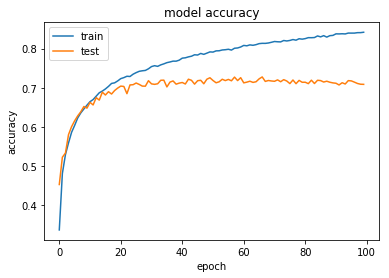

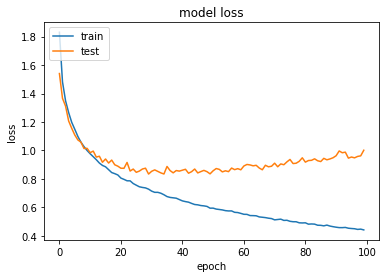

10000/10000 [==============================] - 0s 46us/sample - loss: 1.0013 - acc: 0.7086

Test accuracy: 70.9%


In [0]:
# Functional API
# 

# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train the network
history = model.fit(x_train_gray, y_train, 
                    validation_data=(x_test_gray, y_test),
                    epochs=100, batch_size=batch_size, 
                    validation_split=0.33, verbose=1)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

loss, acc = model.evaluate(x_test_gray, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

As you can see when going up to 100 epoch, the test accuracy gets lower despite the training accuracy increasing. This is due to overfitting. To solve this whilst getting the best number of epoch and lessen training time, we will implement early stopping mechanism.

In [0]:
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
49792/50000 [============================>.] - ETA: 0s - loss: 1.8305 - acc: 0.3364
Epoch 00001: val_acc improved from -inf to 0.43610, saving model to best_model.h5
50000/50000 [==============================] - 6s 126us/sample - loss: 1.8298 - acc: 0.3368 - val_loss: 1.5680 - val_acc: 0.4361
Epoch 2/100
49664/50000 [============================>.] - ETA: 0s - loss: 1.5117 - acc: 0.4686
Epoch 00002: val_acc improved from 0.43610 to 0.46410, saving model to best_model.h5
50000/50000 [==============================] - 6s 117us/sample - loss: 1.5116 - acc: 0.4688 - val_loss: 1.5082 - val_acc: 0.4641
Epoch 3/100
49792/50000 [============================>.] - ETA: 0s - loss: 1.3748 - acc: 0.5209
Epoch 00003: val_acc improved from 0.46410 to 0.54920, saving model to best_model.h5
50000/50000 [==============================] - 6s 116us/sample - loss: 1.3746 - acc: 0.5211 - val_loss: 1.2884 - val_acc: 0.5492
Epoch 4/100
49792/50000

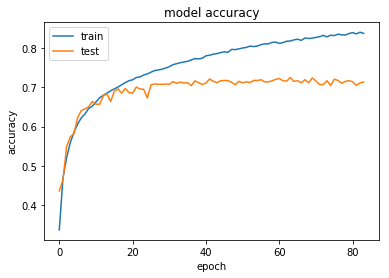

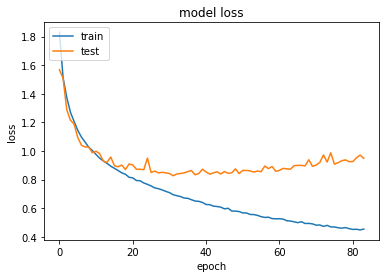

10000/10000 [==============================] - 1s 55us/sample - loss: 0.8731 - acc: 0.7250

Test accuracy: 72.5%


In [0]:
# use functional API to build cnn layers
inputs = Input(shape=input_shape)
y = Conv2D(filters=filters,
           kernel_size=kernel_size,
           activation='relu')(inputs)
y = MaxPooling2D()(y)
y = Conv2D(filters=filters,
           kernel_size=kernel_size,
           activation='relu')(y)
y = MaxPooling2D()(y)
y = Conv2D(filters=filters,
           kernel_size=kernel_size,
           activation='relu')(y)
# image to vector before connecting to dense layer
y = Flatten()(y)
# dropout regularization
y = Dropout(dropout)(y)m
outputs = Dense(num_labels, activation='softmax')(y)

# build the model by supplying inputs/outputs
model = Model(inputs=inputs, outputs=outputs)



# Functional API
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train the network
# simple early stopping
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=20)

history = model.fit(x_train_gray, y_train, 
                    validation_data=(x_test_gray, y_test),
                    epochs=100, batch_size=batch_size, 
                    callbacks=[es, mc], validation_split=0.33,
                   verbose=1)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

saved_model = load_model('best_model.h5')

loss, acc = saved_model.evaluate(x_test_gray, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

#### Increasing kernel size

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
49536/50000 [============================>.] - ETA: 0s - loss: 1.8777 - acc: 0.3115
Epoch 00001: val_acc improved from -inf to 0.42330, saving model to best_model.h5
50000/50000 [==============================] - 9s 172us/sample - loss: 1.8756 - acc: 0.3122 - val_loss: 1.6249 - val_acc: 0.4233
Epoch 2/100
49792/50000 [============================>.] - ETA: 0s - loss: 1.5819 - acc: 0.4347
Epoch 00002: val_acc improved from 0.42330 to 0.48440, saving model to best_model.h5
50000/50000 [==============================] - 6s 113us/sample - loss: 1.5810 - acc: 0.4351 - val_loss: 1.4622 - val_acc: 0.4844
Epoch 3/100
49792/50000 [============================>.] - ETA: 0s - loss: 1.4338 - acc: 0.4917
Epoch 00003: val_acc improved from 0.48440 to 0.52230, saving model to best_model.h5
50000/50000 [==============================] - 6s 114us/sample - loss: 1.4337 - acc: 0.4916 - val_loss: 1.3346 - val_acc: 0.5223
Epoch 4/100
49792/50000

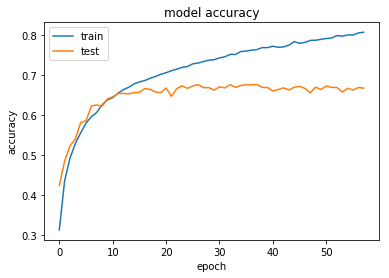

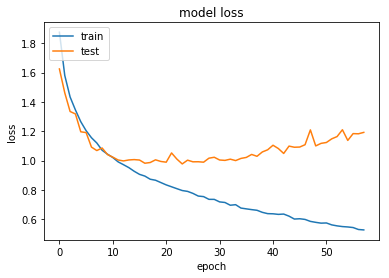

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
10000/10000 [==============================] - 0s 48us/sample - loss: 1.0287 - acc: 0.6760

Test accuracy: 67.6%


In [14]:
# network parameters
# image is processed as is (square grayscale)
input_shape = (image_size, image_size, 1)
batch_size = 128

# CHANGED kernel_size: 3->5
kernel_size = 5

# For every 2x2 square, output of maxpooling is 1 pixel
pool_size = 2

# 64 filters per layer
filters = 64

# Regularizer
dropout = 0.2

# use functional API to build cnn layers
inputs = Input(shape=input_shape)
y = Conv2D(filters=filters,
           kernel_size=kernel_size,
           activation='relu')(inputs)
y = MaxPooling2D()(y)
y = Conv2D(filters=filters,
           kernel_size=kernel_size,
           activation='relu')(y)
y = MaxPooling2D()(y)
y = Conv2D(filters=filters,
           kernel_size=kernel_size,
           activation='relu')(y)
# image to vector before connecting to dense layer
y = Flatten()(y)
# dropout regularization
y = Dropout(dropout)(y)
outputs = Dense(num_labels, activation='softmax')(y)

# build the model by supplying inputs/outputs
model = Model(inputs=inputs, outputs=outputs)



# Functional API
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train the network
# simple early stopping
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=20)

history = model.fit(x_train_gray, y_train, 
                    validation_data=(x_test_gray, y_test),
                    epochs=100, batch_size=batch_size, 
                    callbacks=[es, mc], validation_split=0.33,
                   verbose=1)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

saved_model = load_model('best_model.h5')

loss, acc = saved_model.evaluate(x_test_gray, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

It didn't work. According to the lecture, using stride is better than maxpooling. Let's test it

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
49408/50000 [============================>.] - ETA: 0s - loss: 1.9581 - acc: 0.2842
Epoch 00001: val_acc improved from -inf to 0.39550, saving model to best_model.h5
50000/50000 [==============================] - 5s 92us/sample - loss: 1.9546 - acc: 0.2860 - val_loss: 1.6903 - val_acc: 0.3955
Epoch 2/100
49408/50000 [============================>.] - ETA: 0s - loss: 1.6799 - acc: 0.3962
Epoch 00002: val_acc improved from 0.39550 to 0.44240, saving model to best_model.h5
50000/50000 [==============================] - 4s 81us/sample - loss: 1.6792 - acc: 0.3962 - val_loss: 1.5552 - val_acc: 0.4424
Epoch 3/100
49664/50000 [============================>.] - ETA: 0s - loss: 1.5819 - acc: 0.4352
Epoch 00003: val_acc improved from 0.44240 to 0.44730, saving model to best_model.h5
50000/50000 [==============================] - 4s 82us/sample - loss: 1.5825 - acc: 0.4353 - val_loss: 1.5589 - val_acc: 0.4473
Epoch 4/100
49408/50000 [=

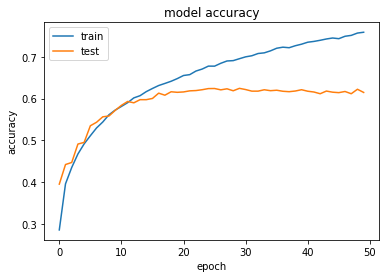

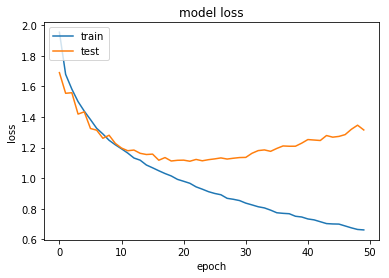

10000/10000 [==============================] - 0s 39us/sample - loss: 1.1347 - acc: 0.6246

Test accuracy: 62.5%


In [15]:
# network parameters
# image is processed as is (square grayscale)
input_shape = (image_size, image_size, 1)
batch_size = 128

# 3x3
kernel_size = 5

# For every 2x2 square, output of maxpooling is 1 pixel
pool_size = 2

# 64 filters per layer
filters = 64

# Regularizer
dropout = 0.2

# use functional API to build cnn layers
inputs = Input(shape=input_shape)
y = Conv2D(filters=filters,
           kernel_size=kernel_size, strides=(2,2),
           activation='relu')(inputs)
# y = MaxPooling2D()(y)
y = Conv2D(filters=filters,
           kernel_size=kernel_size, strides=(2,2),
           activation='relu')(y)
# y = MaxPooling2D()(y)
y = Conv2D(filters=filters,
           kernel_size=kernel_size, strides=(2,2),
           activation='relu')(y)
# image to vector before connecting to dense layer
y = Flatten()(y)
# dropout regularization
y = Dropout(dropout)(y)
outputs = Dense(num_labels, activation='softmax')(y)

# build the model by supplying inputs/outputs
model = Model(inputs=inputs, outputs=outputs)



# Functional API
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train the network
# simple early stopping
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=20)

history = model.fit(x_train_gray, y_train, 
                    validation_data=(x_test_gray, y_test),
                    epochs=100, batch_size=batch_size, 
                    callbacks=[es, mc], validation_split=0.33,
                   verbose=1)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

saved_model = load_model('best_model.h5')

loss, acc = saved_model.evaluate(x_test_gray, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

It didn't improve. How about decreasing batch_size?

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
49664/50000 [============================>.] - ETA: 0s - loss: 1.7411 - acc: 0.3771
Epoch 00001: val_acc improved from -inf to 0.50080, saving model to best_model.h5
50000/50000 [==============================] - 10s 191us/sample - loss: 1.7397 - acc: 0.3776 - val_loss: 1.4304 - val_acc: 0.5008
Epoch 2/100
49728/50000 [============================>.] - ETA: 0s - loss: 1.3513 - acc: 0.5279
Epoch 00002: val_acc improved from 0.50080 to 0.56580, saving model to best_model.h5
50000/50000 [==============================] - 9s 175us/sample - loss: 1.3505 - acc: 0.5281 - val_loss: 1.2350 - val_acc: 0.5658
Epoch 3/100
49856/50000 [============================>.] - ETA: 0s - loss: 1.2116 - acc: 0.5760
Epoch 00003: val_acc improved from 0.56580 to 0.60000, saving model to best_model.h5
50000/50000 [==============================] - 9s 171us/sample - loss: 1.2112 - acc: 0.5761 - val_loss: 1.1630 - val_acc: 0.6000
Epoch 4/100
49792/5000

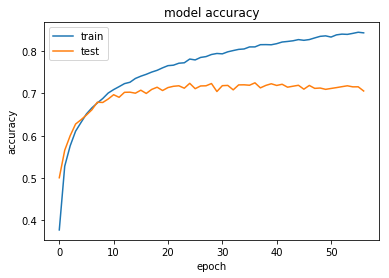

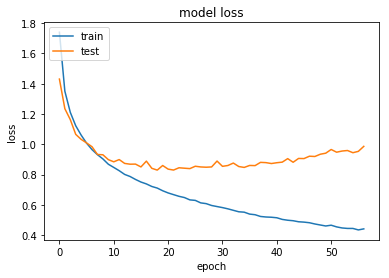

10000/10000 [==============================] - 1s 78us/sample - loss: 0.8594 - acc: 0.7250

Test accuracy: 72.5%


In [16]:
# network parameters
# image is processed as is (square grayscale)
input_shape = (image_size, image_size, 1)
batch_size = 64

# 3x3
kernel_size = 3

# For every 2x2 square, output of maxpooling is 1 pixel
pool_size = 2

# 64 filters per layer
filters = 64

# Regularizer
dropout = 0.2

# use functional API to build cnn layers
inputs = Input(shape=input_shape)
y = Conv2D(filters=filters,
           kernel_size=kernel_size,
           activation='relu')(inputs)
y = MaxPooling2D()(y)
y = Conv2D(filters=filters,
           kernel_size=kernel_size,
           activation='relu')(y)
y = MaxPooling2D()(y)
y = Conv2D(filters=filters,
           kernel_size=kernel_size,
           activation='relu')(y)
# image to vector before connecting to dense layer
y = Flatten()(y)
# dropout regularization
y = Dropout(dropout)(y)
outputs = Dense(num_labels, activation='softmax')(y)

# build the model by supplying inputs/outputs
model = Model(inputs=inputs, outputs=outputs)



# Functional API
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train the network
# simple early stopping
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=20)

history = model.fit(x_train_gray, y_train, 
                    validation_data=(x_test_gray, y_test),
                    epochs=100, batch_size=batch_size, 
                    callbacks=[es, mc], validation_split=0.33,
                   verbose=1)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

saved_model = load_model('best_model.h5')

loss, acc = saved_model.evaluate(x_test_gray, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

It is the same as earlier. But, it reached the same accuracy at an earlier epoch.

#### Comparison to MLP
As expected, simple CNN is better than MLP in terms of classifying the cifar10 dataset. This is due to the network being inherently better at identifying spatial features as compared to Multi-Layer Perceptron.